# Gege Mayrendra

## Data Science Hck-04

# Working Area

## Problem Statement

`Silakan memilih topik Milestones 2 antara Regression, Classification, atau Clustering.`

`from statement above, i decided to choose a dataset talking about smoke detection, in order this model could be implemented in any needed place`

## Objective

- What is the distribution of Fire Alarm?
- What is the average age of Temperature?
- Humidity vs Temperature??
- Does eCO2 affect Fire Alarm?

### Import Libraries
`Importing data that we use during our project along with the library`

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from phik import phik_matrix
from phik.report import plot_correlation_matrix

import joblib
import json

import warnings
warnings.filterwarnings(action='ignore')


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, precision_score, f1_score, roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix

## Data Loading

`we import our csv and inspect the characteristic from the dataset before we explore more`

`first of all, we need to reading our dataset and assigning into df variable, at this moment we also using function to separate the possibility missing value in dataset`

In [86]:
smoke = pd.read_csv('smoke_detection_iot.csv',na_values=[' ', '-', '?' ,'n/a', 'na', '--'])

`setting up the the display into showing all the columns`

In [87]:
pd.set_option('display.max_columns', None)

`calling the dataframe`

In [88]:
smoke

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


`we might need to list how many columns in this dataset`

In [89]:
smoke.columns

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

`checking the rows and columns using .shape`

In [90]:
smoke.shape

(62630, 16)

`its a pretty big dataset, now checking if there is a chance this dataset has a duplicated rows using .duplicated`

In [91]:
smoke[smoke.duplicated()].shape

(0, 16)

`cool, there is not any single duplicated rows in this dataset, now we want to know this dataset in general using .info`

In [92]:
smoke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


`from df.info we now know this dataset has 8 dtype float64 and 8 dtype int64 and for the next dataset exploration we showing the head, tail and sample`

In [93]:
smoke.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [94]:
smoke.tail()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0
62629,62629,1655130051,19.299,16.52,643,400,13696,20543,936.676,0.57,0.59,3.90,0.607,0.014,5743,0


In [95]:
smoke.sample()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
28454,28454,1654764803,20.37,57.09,319,400,13110,19894,939.703,1.13,1.18,7.8,1.216,0.027,3460,1


`using df.describe to know mean Q1, Q2 and etc`

In [96]:
smoke.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,62630.0,3.131450e+04,18079.868017,0.000000e+00,1.565725e+04,3.131450e+04,4.697175e+04,6.262900e+04
UTC,62630.0,1.654792e+09,110002.488078,1.654712e+09,1.654743e+09,1.654762e+09,1.654778e+09,1.655130e+09
Temperature[C],62630.0,1.597042e+01,14.359576,-2.201000e+01,1.099425e+01,2.013000e+01,2.540950e+01,5.993000e+01
Humidity[%],62630.0,4.853950e+01,8.865367,1.074000e+01,4.753000e+01,5.015000e+01,5.324000e+01,7.520000e+01
TVOC[ppb],62630.0,1.942058e+03,7811.589055,0.000000e+00,1.300000e+02,9.810000e+02,1.189000e+03,6.000000e+04
eCO2[ppm],62630.0,6.700210e+02,1905.885439,4.000000e+02,4.000000e+02,4.000000e+02,4.380000e+02,6.000000e+04
Raw H2,62630.0,1.294245e+04,272.464305,1.066800e+04,1.283000e+04,1.292400e+04,1.310900e+04,1.380300e+04
Raw Ethanol,62630.0,1.975426e+04,609.513156,1.531700e+04,1.943500e+04,1.950100e+04,2.007800e+04,2.141000e+04
Pressure[hPa],62630.0,9.386276e+02,1.331344,9.308520e+02,9.387000e+02,9.388160e+02,9.394180e+02,9.398610e+02
PM1.0,62630.0,1.005943e+02,922.524245,0.000000e+00,1.280000e+00,1.810000e+00,2.090000e+00,1.433369e+04


## Data Cleaning

`we need to check if the dataset has been contained with missing value, so we use isnull.sum to check the dataset in general`

In [97]:
smoke.isnull().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

`sweet, there is any missing value in this data set, for make it sure we might need a second checking missing value using loop`

In [98]:
miss_vals = {}

for i in list(smoke.columns):
    miss_vals[i] = 0
    for n in smoke[i]:
        if n in ['N/A', '--', '-', 'Null','?']:
            miss_vals[i] = miss_vals[i] + 1
miss_vals

{'Unnamed: 0': 0,
 'UTC': 0,
 'Temperature[C]': 0,
 'Humidity[%]': 0,
 'TVOC[ppb]': 0,
 'eCO2[ppm]': 0,
 'Raw H2': 0,
 'Raw Ethanol': 0,
 'Pressure[hPa]': 0,
 'PM1.0': 0,
 'PM2.5': 0,
 'NC0.5': 0,
 'NC1.0': 0,
 'NC2.5': 0,
 'CNT': 0,
 'Fire Alarm': 0}

`now we believe our dataset already clean from all the missing values, after learned the columns of this dataset, we decided to drop Unnamed and UTC column. it is because those columns didnt give us an infromation that we need for our next precessing`

In [99]:
smoke = smoke.loc[:, ~smoke.columns.isin(['Unnamed: 0','UTC'])]


In [100]:
smoke

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


`the we rename colum target from Fire Alarm to Fire_Alarm so our next processing would be easier`

In [101]:
smoke.rename(columns={'Fire Alarm': 'Fire_Alarm','Temperature[C]' : 'Temperature','Humidity[%]': 'Humidity','TVOC[ppb]':'TVOC','eCO2[ppm]':'eCO2','Raw H2':'Raw_H2','Raw Ethanol':'Raw_Ethanol','Pressure[hPa]':'Pressure'}, inplace=True)


## Exploratory Data Analysis (EDA)

`in this section we will observe and visualize the data deeper`

- What is the distribution of Fire Alarm?

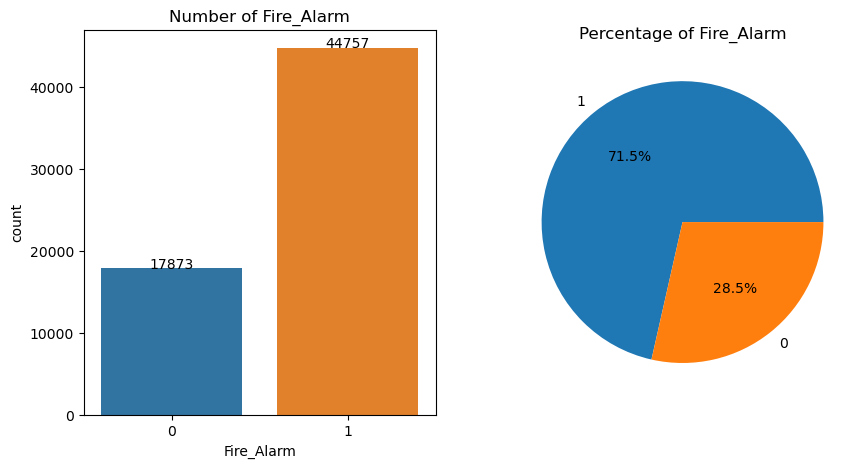

In [102]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
fig = sns.countplot(x = 'Fire_Alarm',data= smoke)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 25, '{:1.0f}'.format(height), ha="center")
plt.title('Number of Fire_Alarm')

plt.subplot(1,2,2)
plt.pie(smoke.Fire_Alarm.value_counts(), labels= smoke.Fire_Alarm.value_counts().index, autopct = '%1.1f%%')
plt.title('Percentage of Fire_Alarm')
plt.show()

`from insgiht above, we can conclude the fire alarm is pretty often to rang, because 1 is represent there is fire and 0 represent no fire. the alarm rang 44757 times and it was 71.5% that all the all`

- What is the average age of Temperature?

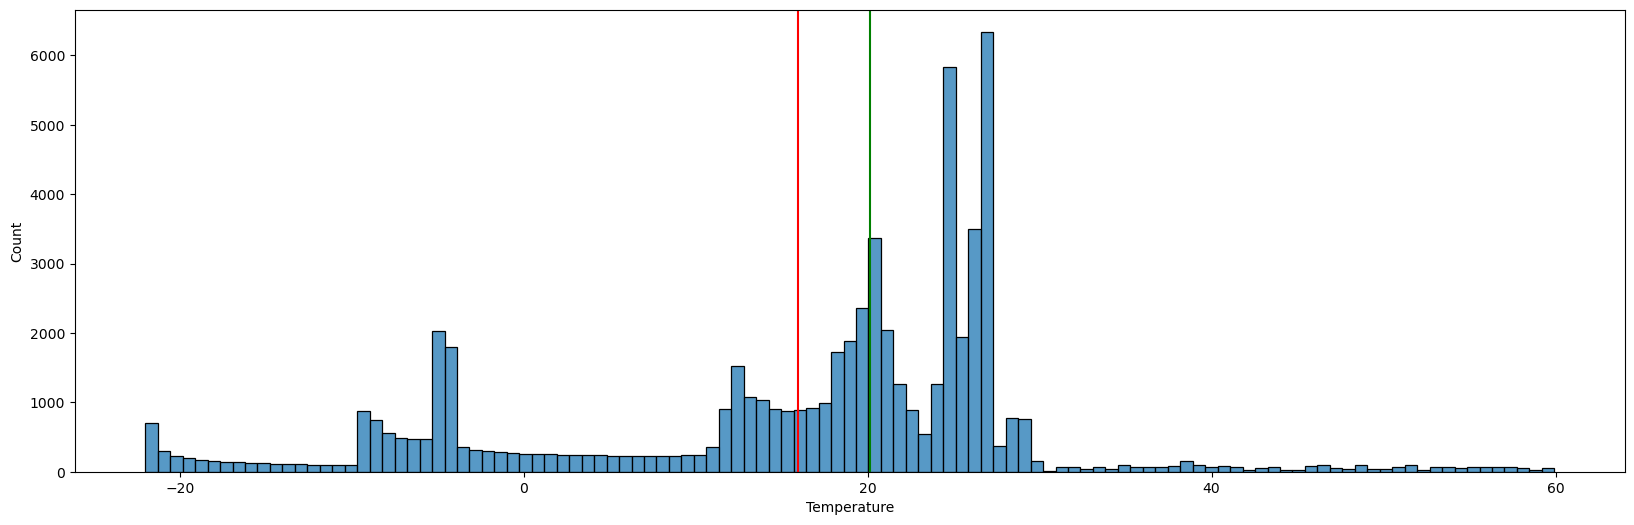

In [103]:
plt.figure(figsize=(20,6))
sns.histplot(x = 'Temperature',data= smoke)
plt.axvline(smoke.Temperature.mean(), color = 'r', label = 'Mean')
plt.axvline(smoke.Temperature.median(), color = 'g', label = 'Median')

`the temperature has variace of number, start from -20 till 60 celcius. the average temperature is being represent with red line around 17 celcius and median of temperature is 20 celcius`

- Humidity vs Temperature?

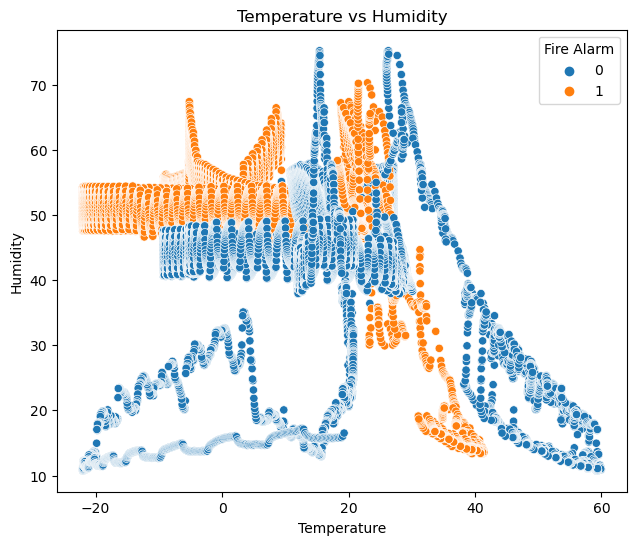

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 2)
sns.scatterplot(x='Temperature', y='Humidity', hue='Fire_Alarm', data=smoke)
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend(title='Fire Alarm')

plt.show()


`even the scatterplot above makes us dizzy,the insight that we can collect is the fire alarm would be more often to rang as long as the temperature rising. the humidity also influence the alarm, we we look deeper, the fire alarm always rang above 40-50 in scale of humidity`

- Does eCO2 affect Fire Alarm?

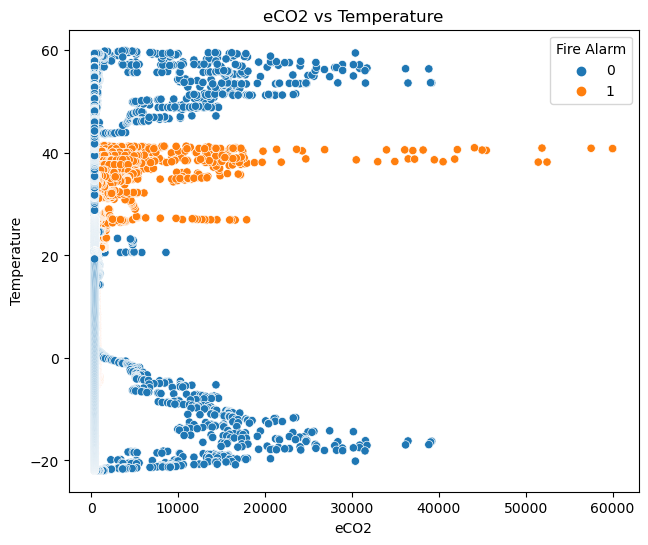

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 2)
sns.scatterplot(x='eCO2', y='Temperature', hue='Fire_Alarm', data=smoke)
plt.title('eCO2 vs Temperature')
plt.xlabel('eCO2')
plt.ylabel('Temperature')
plt.legend(title='Fire Alarm')

plt.show()


- `the fire alarm usualy rang when the temperature is reach 30-40 celcius, along with the eCO2, the higher the air contains with eCO2, the fire alarm will rang`

In [106]:
smoke.phik_matrix().loc['Fire_Alarm'].sort_values(ascending=False)

interval columns not set, guessing: ['Temperature', 'Humidity', 'TVOC', 'eCO2', 'Raw_H2', 'Raw_Ethanol', 'Pressure', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire_Alarm']


Fire_Alarm     1.000000
CNT            0.947941
Raw_Ethanol    0.847418
Pressure       0.659059
Humidity       0.657765
Temperature    0.513491
Raw_H2         0.503421
TVOC           0.376184
eCO2           0.292385
NC0.5          0.177243
PM1.0          0.176496
PM2.5          0.153783
NC1.0          0.152093
NC2.5          0.119057
Name: Fire_Alarm, dtype: float64

`after checking the correlation using phik.matrix, now we know how high the correlation between these column into our target. i personally using treshhold at 0.2, so correlation columns below 0.2 will not be processed`

In [110]:
smoke_fix = smoke[['Temperature', 'Humidity', 'TVOC', 'eCO2', 'Raw_H2',
       'Raw_Ethanol', 'Pressure','Fire_Alarm']]

`now we need to know each unique value to every columns, as we need to check the multicollinearity`

In [111]:
smoke_fix.nunique()

Temperature    21672
Humidity        3890
TVOC            1966
eCO2            1713
Raw_H2          1830
Raw_Ethanol     2659
Pressure        2213
Fire_Alarm         2
dtype: int64

In [112]:
# VIF Calculator
def vif(c):
    vif = pd.DataFrame()
    vif['Column'] = c.columns
    vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]

    return vif

In [120]:
#search for multicolinearity
vif(smoke[['Temperature', 'Humidity', 'TVOC', 'eCO2', 'Raw_H2',
       'Raw_Ethanol', 'Pressure']])

,Column,VIF
0,Temperature,2.438344
1,Humidity,57.235376
2,TVOC,3.523436
3,eCO2,2.383932
4,Raw_H2,5984.743566
5,Raw_Ethanol,2561.516910
6,Pressure,7287.419987


`in order to check the multicolinearity, our column seems to have more value tha 10 as our treshold but we need these column to the next processing, so we stick with our chosen columns`

## Feature Engineering

`we do split and train our data in this section`

`first we split our data into train, validation and test`

In [121]:
smoke_train_val, smoke_test = train_test_split(smoke_fix, test_size=0.1, random_state=27, stratify=smoke_fix.Fire_Alarm)
smoke_train, smoke_val = train_test_split(smoke_train_val, test_size=0.2, random_state=27, stratify=smoke_train_val.Fire_Alarm)

`we split the dataset into 3 categories and has 3 propotion for each of them`

In [122]:
print(f'smoke_train proportion: {len(smoke_train) / len(smoke_fix):.1f}')
print(f'smoke_val proportion: {len(smoke_val) / len(smoke_fix):.1f}')
print(f'smoke_test proportion: {len(smoke_test) / len(smoke_fix):.1f}')

smoke_train proportion: 0.7
smoke_val proportion: 0.2
smoke_test proportion: 0.1


`i personally choose 0.7 to train because the bigger the data has learn, the expectation of implementation in validation and test is pretty high`

`calling the smoke train dataframe`

In [123]:
smoke_train

,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,Fire_Alarm
7210,-4.744,50.73,236,400,13136,20027,939.539,1
15337,12.367,50.97,1184,449,12868,19444,938.834,1
50290,32.370,33.74,278,3252,12601,19714,931.052,1
30188,20.610,49.48,36,400,13243,20183,939.694,1
59775,20.243,48.32,180,429,12772,20532,937.399,0
...,...,...,...,...,...,...,...,...
24131,-11.419,48.11,1132,400,13036,19447,938.765,1
11976,16.545,50.45,1113,605,12812,19449,939.032,1
59830,20.775,47.77,179,427,12769,20540,937.413,0
26963,19.470,47.18,56,400,13125,20004,939.578,0


`checking the outliers of all the features`

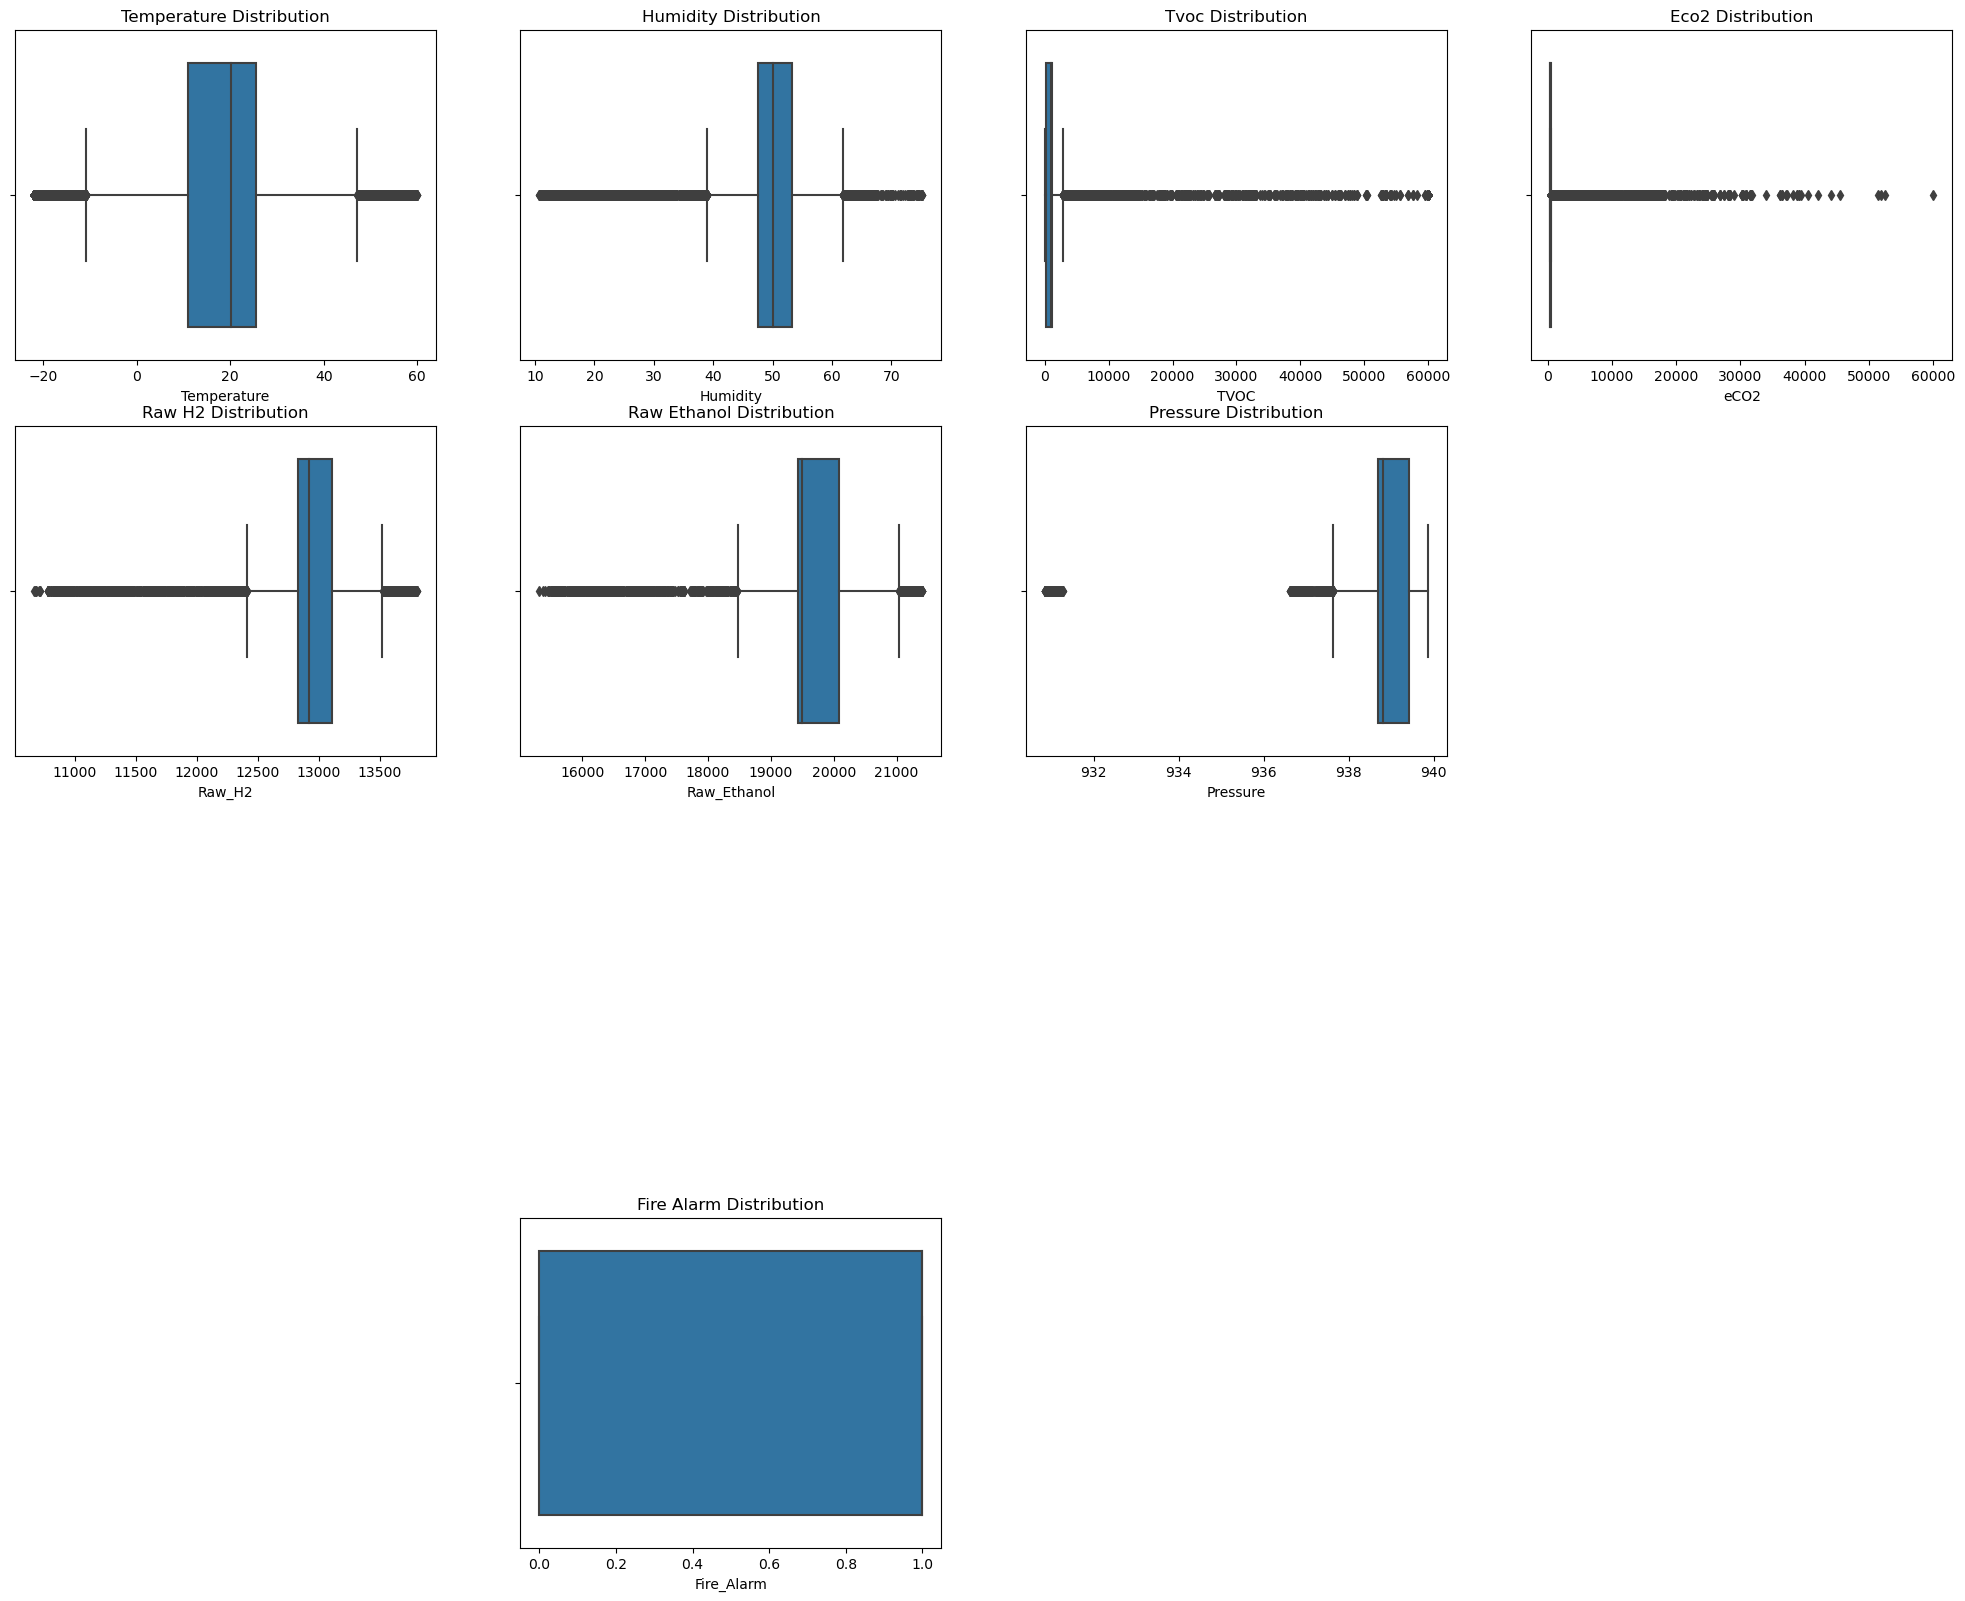

In [124]:
plt.figure(figsize=(25, 30))
for col in smoke_train.columns:
    plt.subplot(6, 4, smoke.columns.get_loc(col) + 1)
    sns.boxplot(x=col, data=smoke_train)
    plt.title(f"{col.replace('_', ' ').title()} Distribution")
plt.show()

In [125]:
# outliers detection
def upper_lower(smoke, col):
    IQR = smoke[col].quantile(0.75) - smoke[col].quantile(0.25)
    upper_limit = smoke[col].quantile(0.75) + 3 * IQR
    lower_limit = smoke[col].quantile(0.25) - 3 * IQR
    return smoke[(smoke[col] < lower_limit) | (smoke[col] > upper_limit)]

In [126]:
# Check Outliers
cols = smoke_train.columns
outlier_precentage = pd.DataFrame(columns=['Column', 'Outlier Precentage'])
for i in range(len(cols)):
    outlier_precentage.loc[i] = [cols[i], round(upper_lower(smoke_train, cols[i]).shape[0] / smoke_train.shape[0] * 100, 2)]
outlier_precentage

,Column,Outlier Precentage
0,Temperature,0.00
1,Humidity,6.02
2,TVOC,3.51
3,eCO2,14.85
4,Raw_H2,1.47
5,Raw_Ethanol,1.24
6,Pressure,1.83
7,Fire_Alarm,0.00


`after checking the outlier of the dataset, now we know that there are some outliers in our dataset. i decided to split into 2 categories which has high outliers percentage such as Humidity, eCO2 and TVOC that has range outliers start from 3.00 til 14.00.  the coloumns left i will consider as a low outliers percentage or we will treat it as normal columns`

### Model Definition

`splitting the features and target`

In [127]:
# Feature & Target selection
X_train = smoke_train.drop(columns=['Fire_Alarm']) # Features
y_train = smoke_train['Fire_Alarm'] # Target

X_val = smoke_val.drop(columns=['Fire_Alarm']) # Features
y_val = smoke_val['Fire_Alarm'] # Target

`before we move into the next process, we should check if our target has a balance target or not, so we using value_counts to discover it`

In [128]:
y_train.value_counts()

1    32224
0    12869
Name: Fire_Alarm, dtype: int64

`our target doesnt consider as a balance value, so we will use smote to make it balance with focusing on minority`

In [129]:
smote = SMOTE(sampling_strategy='minority', random_state=23)
X_smoted, y_smoted = smote.fit_resample(X_train, y_train)

`re-checking our target value`

In [130]:
y_smoted.value_counts()

1    32224
0    32224
Name: Fire_Alarm, dtype: int64

`our target now has a balance value our next processing is making a pipeline` 

### Pipeline

`building the pipeline for the next preprocess`

In [132]:
numeric_norm = Pipeline([
        ('outlier', Winsorizer(capping_method='gaussian', tail='both', fold=1.5)),
        ('scaler', StandardScaler())
    ])
numeric_pipe = numeric_norm.fit_transform(X_smoted[['Temperature', 'Raw_H2',
       'Raw_Ethanol', 'Pressure']])

numeric_outl = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=3)),
        ('scaler', MinMaxScaler())
    ])
num_outl_pipe = numeric_outl.fit_transform(X_smoted[['Humidity', 'TVOC', 'eCO2']])

`as i already explain above, i decided to split the outliers into 2 categories as a high and low. high outliers percentage we will use winsorizer with iqr capping method with fold 3 because it has an extreme skew and a lot of data outliers. the other hand, low percentage or normal columns i  decided to use winsorizer with gaussian capping methode with fold only 1.5 `

In [134]:
full_pipeline = ColumnTransformer([
        ("num_norm", numeric_norm, ['Temperature', 'Raw_H2',
       'Raw_Ethanol', 'Pressure']),
        ("num_outl", numeric_outl, ['Humidity', 'TVOC', 'eCO2'])
    ])

train_tr = full_pipeline.fit_transform(X_smoted)
val_tr = full_pipeline.transform(X_val)

`combine the pipeline and using columnTransformer and fitted in into X smoted and X val`

## Model Training

`we use cross validation that contains 6 model (logistic, SVC, Decission Tree, Random Forest, Kneighbors, Gradient) in order to search the best model to handle ur data`

In [135]:
# Defining Logistic Regression Model
log_model = LogisticRegression(max_iter=1000000)
# Defining SVM Classifier Model
svm_model = SVC()
# Defining Decision Tree Classifier Model
tree_model = DecisionTreeClassifier()
# Defining Random Forest Classifier Model
forest_model = RandomForestClassifier()
# Defining KNN Classifier Model
knn_model = KNeighborsClassifier()
# Defining AdaBoost Classifier Model
gradient_model = GradientBoostingClassifier()

In [136]:
skfold=StratifiedKFold(n_splits=5)
cv_log_model = cross_val_score(log_model, train_tr, y_smoted, cv=skfold, scoring="recall")
cv_svm_model = cross_val_score(svm_model, train_tr, y_smoted, cv=skfold, scoring="recall")
cv_tree_model = cross_val_score(tree_model, train_tr, y_smoted, cv=skfold, scoring="recall")
cv_forest_model = cross_val_score(forest_model, train_tr, y_smoted, cv=skfold, scoring="recall")
cv_knn_model = cross_val_score(knn_model, train_tr, y_smoted, cv=skfold, scoring="recall")
cv_gradient_model = cross_val_score(gradient_model, train_tr, y_smoted, cv=skfold, scoring="recall")
name_model = []
cv_scores=0
for cv,name in zip([cv_log_model,cv_svm_model,cv_forest_model,cv_tree_model,cv_knn_model,cv_gradient_model],['log_model','svm_model','forest_model','tree_model','knn_model','gradient_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Val-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

log_model
recall - All - Cross Validation  :  [0.89806051 0.89231963 0.89480217 0.8909232  0.89944134]
recall - Mean - Cross Validation :  0.8951093697855945
recall - Std - Cross Validation  :  0.003251962287052535
recall - Range of Val-Set       :  0.891857407498542 - 0.898361332072647
--------------------------------------------------
svm_model
recall - All - Cross Validation  :  [0.97703646 0.97595035 0.97439876 0.97564003 0.97998138]
recall - Mean - Cross Validation :  0.9766013958534685
recall - Std - Cross Validation  :  0.0018874987076815018
recall - Range of Val-Set       :  0.974713897145787 - 0.97848889456115
--------------------------------------------------
forest_model
recall - All - Cross Validation  :  [0.99953452 1.         0.99984484 1.         1.        ]
recall - Mean - Cross Validation :  0.9998758727695888
recall - Std - Cross Validation  :  0.00018094497734197568
recall - Range of Val-Set       :  0.9996949277922468 - 1.0000568177469307
---------------------------

`from cross validation, we got that Decision Tree is the best model to handle this dataset, forest model has 99% til 100%, cv=skfold, priotizing recall value. the reason why i choose recall as our main target is because recall has a false negative or in our business it means that the machine is fail to predict the fire, but in reality the fire is on its way`

In [137]:
def base_model_train_eval(model):
    mod = model
    mod.fit(train_tr, y_smoted)

    mod_train = mod.predict(train_tr)
    mod_val = mod.predict(val_tr)

    cm = confusion_matrix(y_val, mod_val, labels=mod.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=mod.classes_)

    print(classification_report(y_smoted, mod_train))
    print(classification_report(y_val, mod_val))
    disp.plot()
    plt.show()

`making the base model of Logistic Regression to see the classification report and its confusion matrix`

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     32224
           1       0.89      0.90      0.89     32224

    accuracy                           0.89     64448
   macro avg       0.89      0.89      0.89     64448
weighted avg       0.89      0.89      0.89     64448

              precision    recall  f1-score   support

           0       0.77      0.89      0.82      3217
           1       0.95      0.89      0.92      8057

    accuracy                           0.89     11274
   macro avg       0.86      0.89      0.87     11274
weighted avg       0.90      0.89      0.89     11274



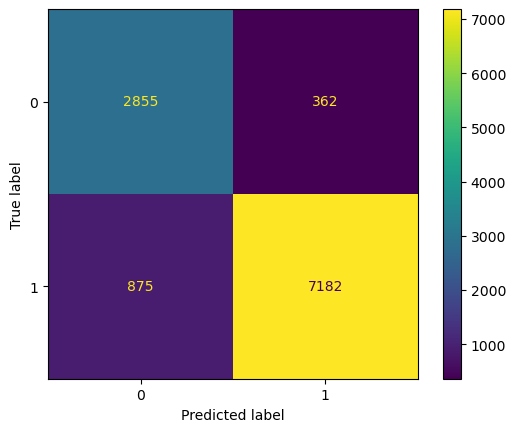

In [138]:
base_model_train_eval(LogisticRegression())

`Logistic Regression has 90% train and 89% test, which is a good model score actually. but the confusion matrix of logistic regression is really high for it false negative, the model has failed to predict more than 800 actual fire`

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     32224
           1       1.00      0.98      0.99     32224

    accuracy                           0.99     64448
   macro avg       0.99      0.99      0.99     64448
weighted avg       0.99      0.99      0.99     64448

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3217
           1       1.00      0.98      0.99      8057

    accuracy                           0.98     11274
   macro avg       0.98      0.99      0.98     11274
weighted avg       0.99      0.98      0.98     11274



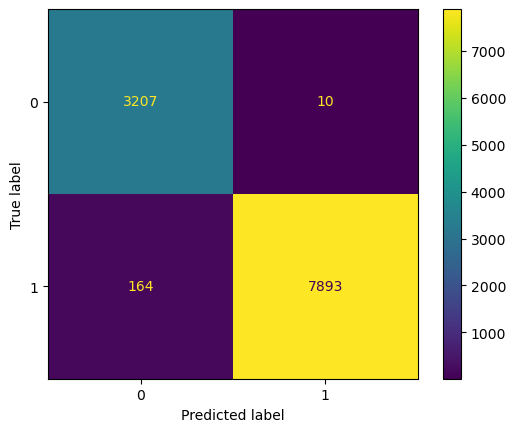

In [139]:
base_model_train_eval(SVC())

`from SVC model we got a pretty high recall value, both train and val is 98%. this is could be a good model but when we look into confusion matrix, the false negative has a high value too, the model has failed 164 prediction of fire`

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32224
           1       1.00      1.00      1.00     32224

    accuracy                           1.00     64448
   macro avg       1.00      1.00      1.00     64448
weighted avg       1.00      1.00      1.00     64448

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3217
           1       1.00      1.00      1.00      8057

    accuracy                           1.00     11274
   macro avg       1.00      1.00      1.00     11274
weighted avg       1.00      1.00      1.00     11274



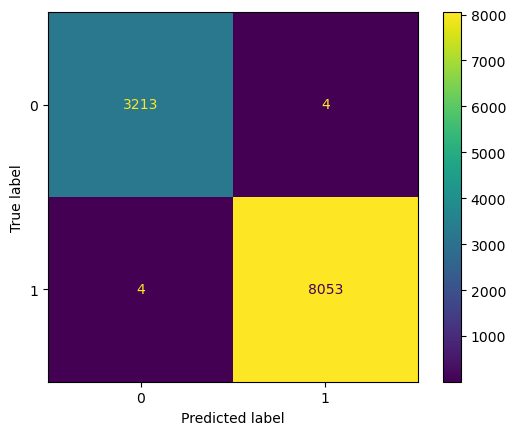

In [140]:
base_model_train_eval(DecisionTreeClassifier())

`we can confidentely says that Decision Tree model has the highest recall value, its all 100% in train and val, after we look into confusion matrix, this model only failed 4 times to predict fire`

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32224
           1       1.00      1.00      1.00     32224

    accuracy                           1.00     64448
   macro avg       1.00      1.00      1.00     64448
weighted avg       1.00      1.00      1.00     64448

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3217
           1       1.00      1.00      1.00      8057

    accuracy                           1.00     11274
   macro avg       1.00      1.00      1.00     11274
weighted avg       1.00      1.00      1.00     11274



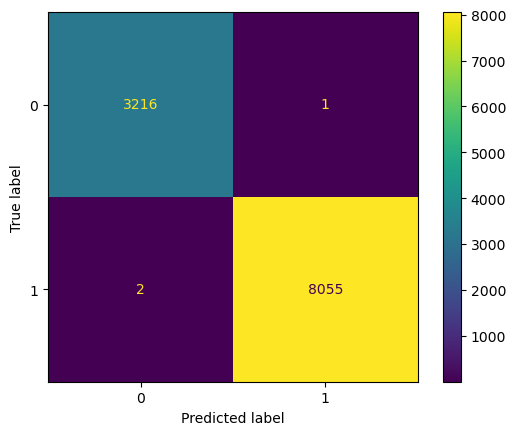

In [141]:
base_model_train_eval(RandomForestClassifier())

`we can confirm that random forest has the best model so far. even the confusion matrix only failed twice to predict the fire`

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32224
           1       1.00      1.00      1.00     32224

    accuracy                           1.00     64448
   macro avg       1.00      1.00      1.00     64448
weighted avg       1.00      1.00      1.00     64448

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3217
           1       1.00      1.00      1.00      8057

    accuracy                           1.00     11274
   macro avg       1.00      1.00      1.00     11274
weighted avg       1.00      1.00      1.00     11274



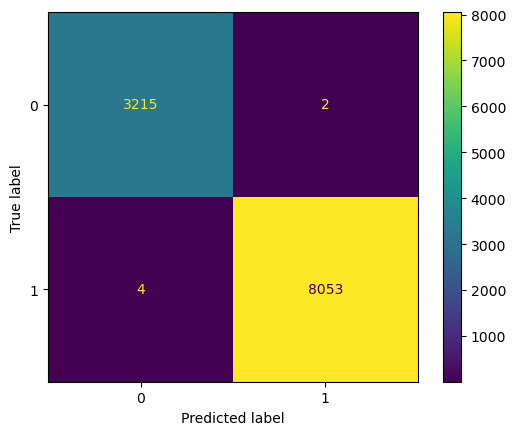

In [142]:
base_model_train_eval(KNeighborsClassifier())

`KNN also has a good value to be our model, but the confusion matrix of this model a little bit failed more than random forest or decision tree`

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32224
           1       1.00      1.00      1.00     32224

    accuracy                           1.00     64448
   macro avg       1.00      1.00      1.00     64448
weighted avg       1.00      1.00      1.00     64448

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3217
           1       1.00      1.00      1.00      8057

    accuracy                           1.00     11274
   macro avg       1.00      1.00      1.00     11274
weighted avg       1.00      1.00      1.00     11274



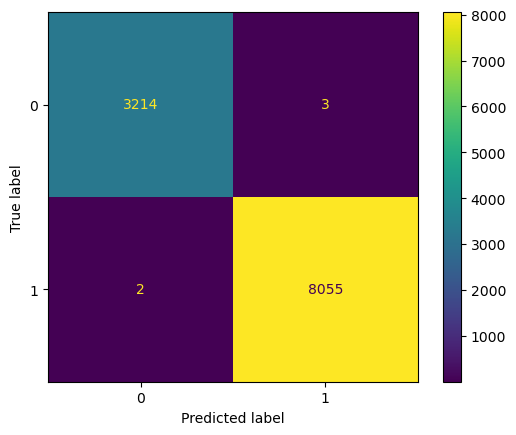

In [143]:
base_model_train_eval(GradientBoostingClassifier())

`Gradient boost also has a good value to be our model, but the confusion matrix of this model a little bit failed more than random forest or decision tree` `

`based on the best model above, we choose to pick Random Forest to given the hyperparameter tunning`

In [144]:
params = [    {'n_estimators': [100, 150],
     'max_features': [4, 1],
     'max_depth': [5, None],
     'criterion': ['gini', 'entropy']}
]

rfc = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(rfc, params, cv=5, scoring='recall', return_train_score=True)

# Use a smaller subset of the data
train_tr_subset = train_tr[:1000]
y_smoted_subset = y_smoted[:1000]

grid_search.fit(train_tr_subset, y_smoted_subset)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [5, None], 'max_features': [4, 1],
                          'n_estimators': [100, 150]}],
             return_train_score=True, scoring='recall')

In [145]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 4,
 'n_estimators': 100}

In [146]:
grid_search.best_score_

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32224
           1       1.00      1.00      1.00     32224

    accuracy                           1.00     64448
   macro avg       1.00      1.00      1.00     64448
weighted avg       1.00      1.00      1.00     64448

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3217
           1       1.00      1.00      1.00      8057

    accuracy                           1.00     11274
   macro avg       1.00      1.00      1.00     11274
weighted avg       1.00      1.00      1.00     11274



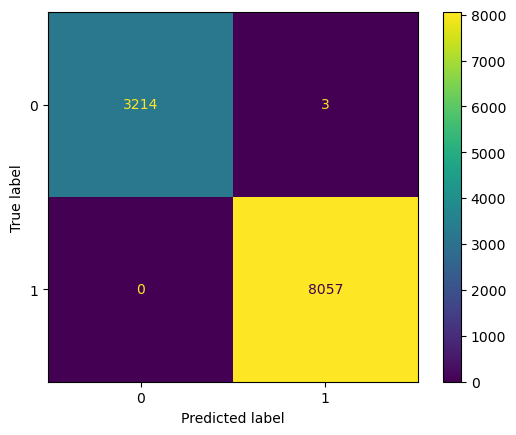

In [147]:
forest_tunning = grid_search.best_estimator_

forest_tunning.fit(train_tr, y_smoted)

forest_tunning_train = forest_tunning.predict(train_tr)
forest_tunning_test = forest_tunning.predict(val_tr)

print(classification_report(y_smoted, forest_tunning_train))
print(classification_report(y_val, forest_tunning_test))

cm = confusion_matrix(y_val, forest_tunning_test, labels=forest_tunning.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=forest_tunning.classes_)

disp.plot()
plt.show()

`sweet! this model has been the best model we had so far. it has a perfect train dan val score. also we look into the recall value or false negative it never wrong predict the fire`

`making the final pipeline to the next model inference process`

In [148]:
all_process_forest = Pipeline([
    ("preprocess", full_pipeline),
    ("classification", forest_tunning)
])

## Model Inferences
`testing the model into data test`

`splitting the data`

In [149]:
# Feature selecting
X_test = smoke_test.drop(['Fire_Alarm'], axis=1) # Feature
y_test = smoke_test['Fire_Alarm'] # Target

`predict`

In [150]:
pred_forest = pd.DataFrame(forest_tunning.predict(X_test))
pred = pd.concat([smoke_test['Fire_Alarm'].reset_index(drop=True), pred_forest], axis=1)
pred.columns = ['Actual', 'Forest']

pred[pred.Actual == 1].head(20)

,Actual,Forest
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
10,1,1


`this model can predict prefectly accurate to our data test. it means that this model works prefectly fine and can be used in real life stuation `

### Data Saving

In [153]:
with open('pred_rfc1.pkl','wb') as file_1:
  joblib.dump(all_process_forest, file_1)

### Overall Analysis

- `this dataset is talked about smoke detection for some conditions. this dataset contain Temperature, Humidity, TVOC, eCO2, Raw H2, Raw Ethanol, Pressure, PM1.0, PM2.5, NC0.5, NC1.0, NC2.5, CNT and Fire_Alarm.`
- `the fire alarm is pretty often to rang, because 1 is represent there is fire and 0 represent no fire. the alarm rang 44757 times and it was 71.5% that all the all`
- `the temperature has variace of number, start from -20 till 60 celcius. the average temperature is being represent with red line around 17 celcius and median of temperature is 20 celcius`
- `even the scatterplot above makes us dizzy,the insight that we can collect is the fire alarm would be more often to rang as long as the temperature rising. the humidity also influence the alarm, when we look deeper, the fire alarm always rang above 40-50 in scale of humidity`
- `the fire alarm usualy rang when the temperature is reach 30-40 celcius, along with the eCO2, the higher the air contains with eCO2, the fire alarm will rang`
- `from cross validation, we got that Decision Tree is the best model to handle this dataset, forest model has 99% til 100%, cv=skfold, priotizing recall value. the reason why i choose recall as our main target is because recall has a false negative or in our business it means that the machine is fail to predict the fire, but in reality the fire is on its way`
- `Logistic Regression has 90% train and 89% test, which is a good model score actually. but the confusion matrix of logistic regression is really high for it false negative, the model has failed to predict more than 800 actual fire`
- `from SVC model we got a pretty high recall value, both train and val is 98%. this is could be a good model but when we look into confusion matrix, the false negative has a high value too, the model has failed 164 prediction of fire`
- `Decision Tree model has the highest recall value, its all 100% in train and val, after we look into confusion matrix, this model only failed 3 times to predict fire`
-`the aRandom Forest that has been given the hyperparameters tuning were the best model we had so far. it has a perfect train dan val score. also we look into the recall value or false negative it never wrong predict the fire`